# Zerocrossing_rate_mobileNetv2

In [1]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras import optimizers, losses, activations, models
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.layers import Dense
from keras import Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
train_path= 'C:/Users/ASUS/Desktop/zero_res/train'
test_path= 'C:/Users/ASUS/Desktop/zero_res/test'
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [3]:
print(class_names)
print(class_names_test)

['abnormal', 'normal']
['abnormal', 'normal']


In [4]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [5]:
train_generator = train_datagen.flow_from_directory('C:/Users/ASUS/Desktop/zero_res/train',target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory('C:/Users/ASUS/Desktop/zero_res/test',target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 495 images belonging to 2 classes.
Found 211 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(224,224,3))
for layer in mobilenet.layers:
    layer.trainable = False
    
    
model = Sequential()
model.add(mobilenet)
# model.add(Dense(128,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1)                 62721     
                                                                 
Total params: 2,320,705
Trainable params: 62,721
Non-trainable params: 2,257,984
_________________________________________________________________


In [7]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# weight_path="{}_weights.best.hdf5".format('spectro_sound_model')
checkpoint = ModelCheckpoint(filepath ="./check.hDf5", monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
# reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', 
#                                    factor=0.8, patience=5, 
#                                    verbose=1, mode='auto', 
#                                    epsilon=0.0001, cooldown=5, 
#                                    min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early]

In [8]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
opt = tf.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, 
    loss=losses.binary_crossentropy, 
    metrics=['accuracy', 'Precision', 'AUC', tf.keras.metrics.Recall(), tf.keras.metrics.TrueNegatives()])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
training_images = 456
validation_images = 144 

history = model.fit_generator(train_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 50,  # change this for better results
                   validation_data = test_generator)  # this should be equal to total number of images in validation set.

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18028/615836474.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results.


Epoch 1/50
16/16 [==============================] - 37s 2s/step - loss: 2.8721 - accuracy: 0.5354 - precision: 0.5560 - auc: 0.5699 - recall: 0.5731 - true_negatives: 116.0000 - val_loss: 3.8043 - val_accuracy: 0.4882 - val_precision: 0.5926 - val_auc: 0.4421 - val_recall: 0.1416 - val_true_negatives: 87.0000
Epoch 2/50
16/16 [==============================] - 31s 2s/step - loss: 1.4863 - accuracy: 0.5939 - precision: 0.6175 - auc: 0.6265 - recall: 0.5962 - true_negatives: 139.0000 - val_loss: 1.2496 - val_accuracy: 0.4645 - val_precision: 0.5000 - val_auc: 0.4826 - val_recall: 0.3451 - val_true_negatives: 59.0000
Epoch 3/50
16/16 [==============================] - 28s 2s/step - loss: 0.9661 - accuracy: 0.6444 - precision: 0.6533 - auc: 0.6608 - recall: 0.6885 - true_negatives: 140.0000 - val_loss: 1.9548 - val_accuracy: 0.3744 - val_precision: 0.3492 - val_auc: 0.4192 - val_recall: 0.1947 - val_true_negatives: 57.0000
Epoch 4/50
16/16 [==============================] - 31s 2s/step - l

In [10]:
import statistics
print (statistics.mean(history.history['accuracy']))
print (statistics.mean(history.history['val_accuracy']))

0.6964040386676789
0.4693838858604431


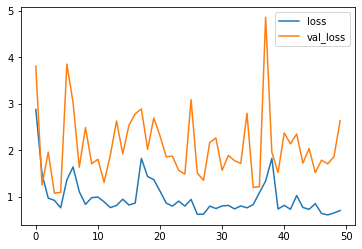

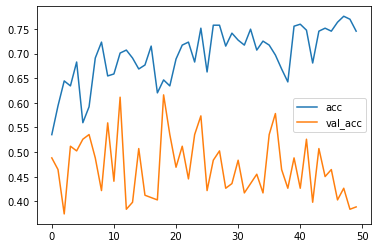

In [11]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [12]:
model.evaluate(test_generator)

7/7 [==============================] - 9s 1s/step - loss: 2.6318 - accuracy: 0.3886 - precision: 0.3095 - auc: 0.3749 - recall: 0.1150 - true_negatives: 69.0000     


[2.6317834854125977,
 0.3886255919933319,
 0.3095238208770752,
 0.3748871088027954,
 0.1150442510843277,
 69.0]